IN THIS SCRIPT I WILL USE THE MOVIES DATABASE TO SELECT COLUMNS AND DO ANALYSIS OF MOVIES DATA SINCE 1920.

MOVIES DATABASE WAS DOWNLOADED FROM https://www.databasestar.com/sample-database-movies/ AND HAVE A LOT OF INFORMATION.

IN THIS SCRIPT I WILL ONLY USE THE 'movie' TABLE TO COLLECT DATA AND DO ANALYSIS. I WILL FILTER AND TREAT THIS TABLE TO GET READY FOR ANALYSIS.

I WILL FIRSTLY INVESTIGATE THE STRUCTURE OF THIS DATABASE AND AFTER SELECT TABLE AND COLUMNS TO WORK WITH.

I WILL USE mysql.connector, pandas, matplotlib AND seaborn LIBRARIES TO RUN THE ANALYSIS.

In [1]:
import mysql.connector

In [2]:
try:
    connection = mysql.connector.connect(
        host = 'localhost',
        user = 'root',
        password = 'sqltraining')
    
except mysql.connector.Error as Error:
    print("Could not connect to the server. Error: {}".format(Error))
    
if connection.is_connected:
    print("You're connected to MySQL server.")    
    server_info = connection.get_server_info()
    print("Running on version:", server_info)
    host_info = (connection.server_host, connection.server_port)
    print("Connected to", host_info[0], "on port", host_info[1])
    user_info = connection.user
    print("User's name:", user_info)
    connection_info = connection.connection_id
    print(connection_info)
    
else:
    print("Could not connect to the server. Error: {}".format(Error))

You're connected to MySQL server.
Running on version: 8.0.22
Connected to localhost on port 3306
User's name: root
45


In [3]:
connection.cmd_init_db('movies')
cursor = connection.cursor(buffered = True)
query_tables = "show tables"
cursor.execute(query_tables)
tables_name = []
for table in cursor:
    print(table[0])
    tables_name.append(table)
cursor.close()

country
department
gender
genre
keyword
language
language_role
movie
movie_cast
movie_company
movie_crew
movie_genres
movie_keywords
movie_languages
person
production_company
production_country


True

In [4]:
cursor = connection.cursor()
rows_tables = []
for name in range(len(tables_name)):
    query = """select count(*) from {}""".format(tables_name[name][0])
    cursor.execute(query)
    rows = cursor.fetchone()
    rows_tables.append(rows)
print(rows_tables)
cursor.close()

[(88,), (12,), (3,), (20,), (9794,), (88,), (2,), (4803,), (106257,), (13677,), (129581,), (12160,), (36162,), (11740,), (104842,), (5047,), (6436,)]


True

In [5]:
table_name_row = []
for i in range(len(rows_tables)):
    table_name_row.append((tables_name[i][0], rows_tables[i][0]))

print(table_name_row)

[('country', 88), ('department', 12), ('gender', 3), ('genre', 20), ('keyword', 9794), ('language', 88), ('language_role', 2), ('movie', 4803), ('movie_cast', 106257), ('movie_company', 13677), ('movie_crew', 129581), ('movie_genres', 12160), ('movie_keywords', 36162), ('movie_languages', 11740), ('person', 104842), ('production_company', 5047), ('production_country', 6436)]


SELECTING SPECIFIC COLUMNS OF TABLE 'movie' TO PERFORM INITIAL ANALYSIS

In [6]:
cursor = connection.cursor(buffered = True)
query_columns = """SHOW COLUMNS FROM movie"""
cursor.execute(query_columns)
for column in cursor:
    print(column[0])
cursor.close()

movie_id
title
budget
homepage
overview
popularity
release_date
revenue
runtime
movie_status
tagline
vote_average
vote_count


True

In [7]:
cursor = connection.cursor()
query_select = """SELECT movie_id, title, budget, popularity, release_date, revenue, vote_average, vote_count FROM movie"""
cursor.execute(query_select)
filtered = cursor.fetchall()
#print(filtered)
cursor.close()

True

IMPORT PANDAS LIBRARY AND EXPORT QUERY FROM MySQL TO CREATE PANDAS DATAFRAME FOR ANALYSIS.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns

In [9]:
df = pd.read_sql("""SELECT 
movie_id, title, budget, popularity, release_date, revenue, vote_average, vote_count 
FROM movie""", connection, index_col= 'movie_id')
display(df)

,title,budget,popularity,release_date,revenue,vote_average,vote_count
movie_id,,,,,,,
5,Four Rooms,4000000,22.876230,1995-12-09,4300000,6.5,530
11,Star Wars,11000000,126.393695,1977-05-25,775398007,8.1,6624
12,Finding Nemo,94000000,85.688789,2003-05-30,940335536,7.6,6122
13,Forrest Gump,55000000,138.133331,1994-07-06,677945399,8.2,7927
14,American Beauty,15000000,80.878605,1999-09-15,356296601,7.9,3313
...,...,...,...,...,...,...,...
426067,Midnight Cabaret,0,0.001389,1990-01-01,0,0.0,0
426469,Growing Up Smith,0,0.710870,2017-02-03,0,7.4,7
433715,8 Days,0,0.015295,2014-06-15,0,0.0,0


INSPECTING DATAFRAME (DATA TREATMENT).

TRANSFORM ZERO VALUES TO 'NA' AND REMOVE ROWS WITH MISSING INFORMATION.

SPLIT DATETIME FORMAT TO DISPLAY ONLY THE YEAR OF RELEASE.

ROUND VALUES.

TRANSFORM TYPES OF OBJECTS.

In [10]:
df = df[df != 0].dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 5 to 417859
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3227 non-null   object 
 1   budget        3227 non-null   float64
 2   popularity    3227 non-null   float64
 3   release_date  3227 non-null   object 
 4   revenue       3227 non-null   float64
 5   vote_average  3227 non-null   float64
 6   vote_count    3227 non-null   float64
dtypes: float64(5), object(2)
memory usage: 201.7+ KB


In [12]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [13]:
df = df.drop(['release_date', 'popularity'], axis = 1)
#df = df.round({'popularity': 2})

In [14]:
print(df['year'].min())
print(df['year'].max())

1916
2016


In [15]:
df[['budget', 'revenue', 'vote_count']] = df[['budget', 'revenue', 'vote_count']].astype(int)

In [16]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 5 to 417859
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3227 non-null   object 
 1   budget        3227 non-null   int32  
 2   revenue       3227 non-null   int32  
 3   vote_average  3227 non-null   float64
 4   vote_count    3227 non-null   int32  
 5   year          3227 non-null   int64  
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 138.7+ KB


Index(['title', 'budget', 'revenue', 'vote_average', 'vote_count', 'year'], dtype='object')

CREATING CATEGORICAL DATA FROM CONTINUOUS VARIABLES.

ORGANIZE RELEASE YEAR WITHIN DECADES TO BETTER VISUALIZE TENDENCIES.

TRANSFORM 'vote_average' INTO CLASSES OF QUALITY (RUIM, MEDIANO, BOM, OTIMO).

In [17]:
decade = pd.cut(df.year,bins=[1915,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020], labels = ['1', '2', '3', '4', '5', '6','7','8','9','10'])
df['decade'] = decade
df['decade'] = df['decade'].astype(int)

vote_class = pd.cut(df.vote_average,bins=[0,4,6,8,10], labels = ['Ruim', 'Mediano', 'Bom', 'Ótimo'])
df.insert(4, column = 'vote_class', value =vote_class)
df

,title,budget,revenue,vote_average,vote_class,vote_count,year,decade
movie_id,,,,,,,,
5,Four Rooms,4000000,4300000,6.5,Bom,530,1995,8
11,Star Wars,11000000,775398007,8.1,Ótimo,6624,1977,6
12,Finding Nemo,94000000,940335536,7.6,Bom,6122,2003,9
13,Forrest Gump,55000000,677945399,8.2,Ótimo,7927,1994,8
14,American Beauty,15000000,356296601,7.9,Bom,3313,1999,8
...,...,...,...,...,...,...,...,...
365222,葉問3,36000000,156844753,6.5,Bom,379,2015,10
375290,Airlift,4500000,32000000,7.3,Bom,57,2016,10
376659,Bad Moms,20000000,183936074,6.3,Bom,1252,2016,10


In [18]:
df.sort_values(by=['year'])

,title,budget,revenue,vote_average,vote_class,vote_count,year,decade
movie_id,,,,,,,,
3059,Intolerance,385907,8394751,7.4,Bom,60,1916,1
3060,The Big Parade,245000,22000000,7.0,Bom,21,1925,1
19,Metropolis,92620000,650422,8.0,Bom,657,1927,1
65203,The Broadway Melody,379000,4358000,5.0,Mediano,19,1929,1
22301,Hell's Angels,3950000,8000000,6.1,Bom,19,1930,1
...,...,...,...,...,...,...,...,...
294272,Pete's Dragon,65000000,143695338,6.2,Bom,679,2016,10
293660,Deadpool,58000000,783112979,7.4,Bom,10995,2016,10
43074,Ghostbusters,144000000,229147509,5.3,Mediano,2142,2016,10


EXPLORATORY ANALYSIS.

AN OVERALL VIEW OF PAIRWISE COMPARISONS.

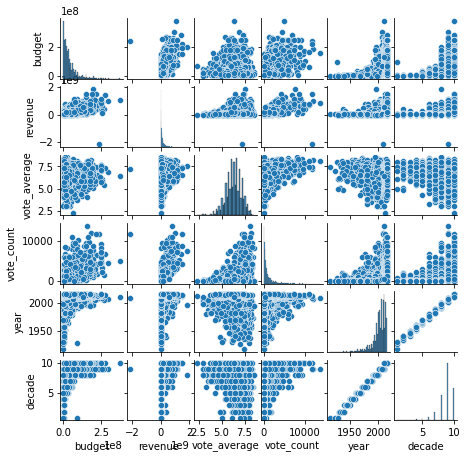

In [19]:
fig = sns.pairplot(df)
fig.fig.set_size_inches(6,6)

A LITTLE CONFUSING, BUT APPARENTLY THERE IS A MOVIE THAT GAVE NEGATIVE REVENUE. THIS MAY BE A MISTAKE ON CREATING DATASET.

SELECT WHICH ROW HAVE NEGATIVE VALUES ON 'revenue' COLUMN. IT SEEMS AN ERROR, SO I CONSIDER THE ABSOLUTE VALUE FOR THIS ROW.

In [20]:
df[df['revenue'] < 0]

,title,budget,revenue,vote_average,vote_class,vote_count,year,decade
movie_id,,,,,,,,
19995,Avatar,237000000,-2147483648,7.2,Bom,11800,2009,9


In [21]:
df['revenue'] = df['revenue'].apply(abs)

NOW LET'S SEPARATE THE ANALYSIS. FIRST BASED ON YEAR OF RELEASE.

ARE THERE ANY RELATION BETWEEN YEAR OF RELEASE AND AVERAGE NOTE?

MOST RECENT FILMS HAS A BIGGER BUDGET THAN OLDER ONES?

DO THE VOTE COUNT INCREASES AS NEWER THE MOVIE ARE?

<AxesSubplot:xlabel='year', ylabel='vote_count'>

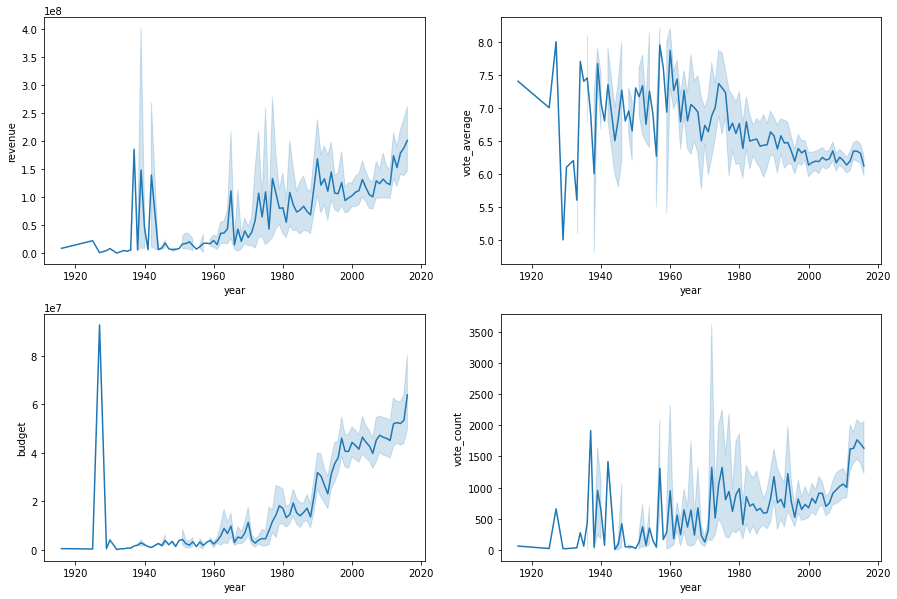

In [52]:
fig, axs = plt.subplots(2,2, figsize = (15,10))

sns.lineplot(x='year', y='revenue', data = df, ax = axs[0,0])
sns.lineplot(x='year', y='vote_average', data = df, ax = axs[0,1])
sns.lineplot(x='year', y='budget', data = df, ax = axs[1,0])
sns.lineplot(x='year', y='vote_count', data = df, ax = axs[1,1])

ARE THERE ANY RELATIONSHIP BETWEEN BUDGET AND REVENUE?

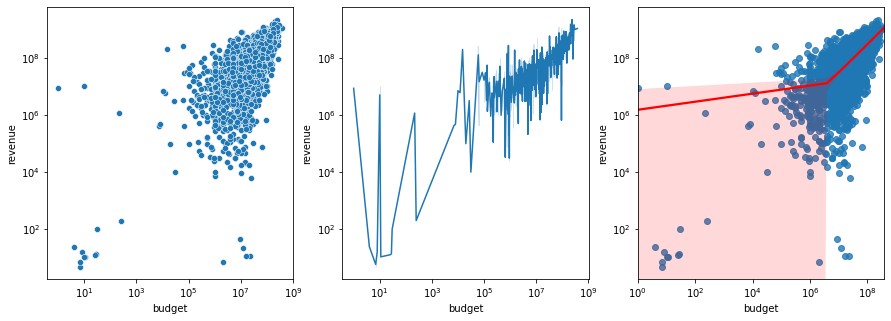

,budget,revenue
budget,1.000000,0.710189
revenue,0.710189,1.000000


In [65]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))

plot1 = sns.scatterplot(data = df, x = 'budget', y = 'revenue', ax = axs[0])
plot1.set(xscale = 'log')
plot1.set(yscale = 'log')
plot2 = sns.lineplot(data = df, x='budget', y = 'revenue', ax = axs[1])
plot2.set(xscale = 'log')
plot2.set(yscale = 'log')
plot3 = sns.regplot(data = df, x='budget', y = 'revenue', line_kws={'color': 'red'}, ax = axs[2])
plot3.set(xscale = 'log')
plot3.set(yscale = 'log')
plt.show()
df[['budget', 'revenue']].corr()

EXCLUDIND BUDGET < 100000 THAT PRESENT A WEIRD SHAPE

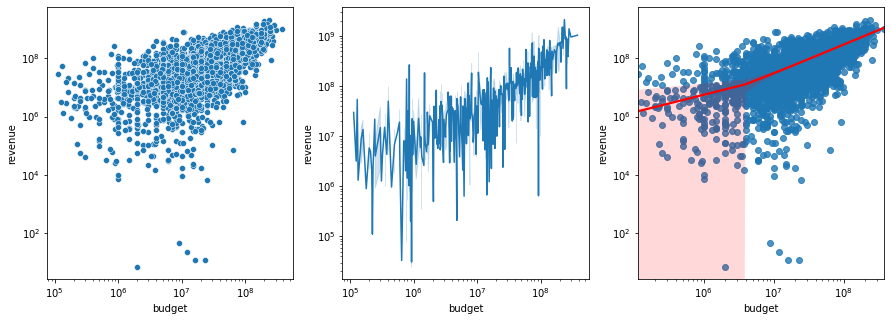

,budget,revenue
budget,1.000000,0.709529
revenue,0.709529,1.000000


In [64]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))

plot1 = sns.scatterplot(data = df[df['budget'] > 100000], x = 'budget', y = 'revenue', ax = axs[0])
plot1.set(xscale = 'log')
plot1.set(yscale = 'log')
plot2 = sns.lineplot(data = df[df['budget'] > 100000], x='budget', y = 'revenue', ax = axs[1])
plot2.set(xscale = 'log')
plot2.set(yscale = 'log')
plot3 = sns.regplot(data = df[df['budget'] > 100000], x='budget', y = 'revenue', line_kws={'color': 'red'}, ax = axs[2])
plot3.set(xscale = 'log')
plot3.set(yscale = 'log')
plt.show()
df[df['budget'] > 100000][['budget', 'revenue']].corr()

DO THE AVERAGE NOTE OF A MOVIE CORRESPOND TO BUDGET DISPENDED?

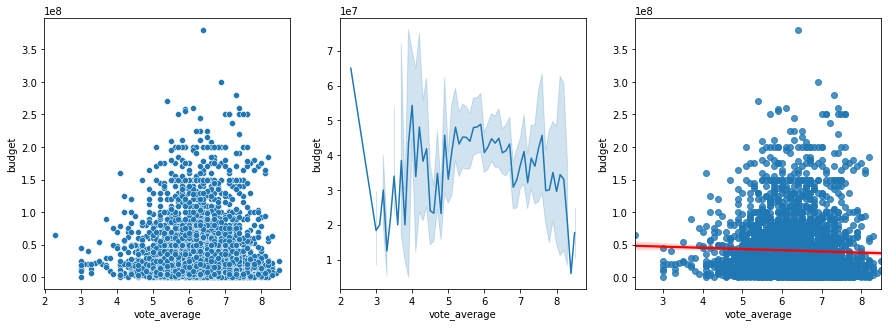

In [67]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
plot1 = sns.scatterplot(data = df, x = 'vote_average', y = 'budget', ax = axs[0])
plot2 = sns.lineplot(data = df, x = 'vote_average', y = 'budget', ax = axs[1])
plot3 = sns.regplot(data = df, x = 'vote_average', y = 'budget', line_kws = {'color': 'red'}, ax = axs[2])
plt.show()

AND WITH REVENUE?

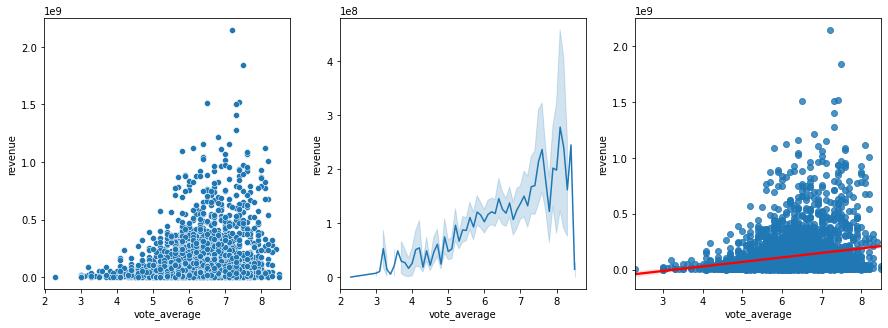

In [68]:
fig, axs = plt.subplots(1,3, figsize = (15,5))
plot1 = sns.scatterplot(data = df, x = 'vote_average', y = 'revenue', ax = axs[0])
plot2 = sns.lineplot(data = df, x = 'vote_average', y = 'revenue', ax = axs[1])
plot3 = sns.regplot(data = df, x = 'vote_average', y = 'revenue', line_kws = {'color': 'red'}, ax = axs[2])
plt.show()

TO BETTER VISUALIZATION, WE CAN TRANSFORM CONTINUOUS VALUES IN CATEGORICAL DATA. I DID IT TO 'vote_average' AND TO 'year' COLUMNS.



<AxesSubplot:xlabel='vote_class', ylabel='revenue'>

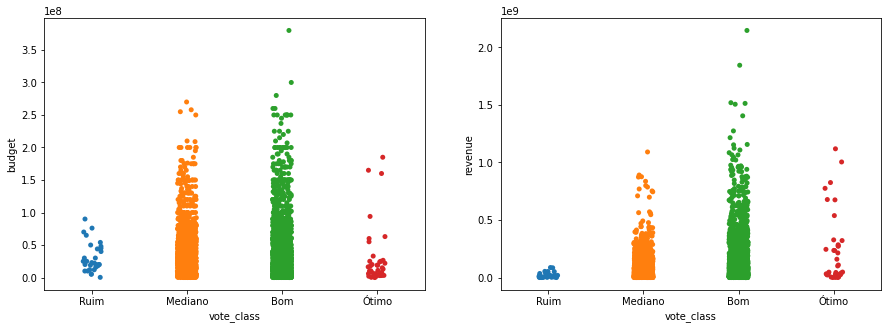

In [53]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))
sns.stripplot(x = 'vote_class', y = 'budget', data = df, ax = axs[0])
sns.stripplot(x = 'vote_class', y = 'revenue', data = df, ax = axs[1])

DO THE AVERAGE NOTE DECREASES AS THE VOTE COUNT INCREASES? APARRENTLY NOT.

,vote_average,vote_count
vote_average,1.000000,0.380825
vote_count,0.380825,1.000000


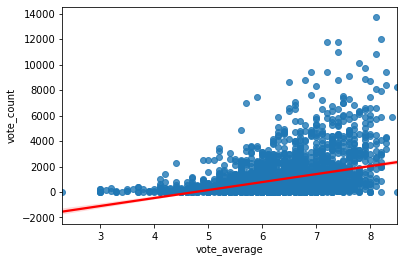

In [69]:
sns.regplot(x = 'vote_average', y = 'vote_count', data = df, line_kws = {'color': 'red'})
df[['vote_average', 'vote_count']].corr()

IS THERE ANY RELANTIONSHIP BETWEEN PERIODS OF BETTER MOVIES PRODUCED?

CONSIDERING ALL THE MOVIES PRODUCED WITHIN A DECADE.

IT SEEMS THAT ON AVERAGE, NEWER MOVIES ARE LESS RANKED THAN OLD ONES, BUT THAT COULD BE AN EFFECT OF QUANTITIES OF MOVIES PRODUCED.

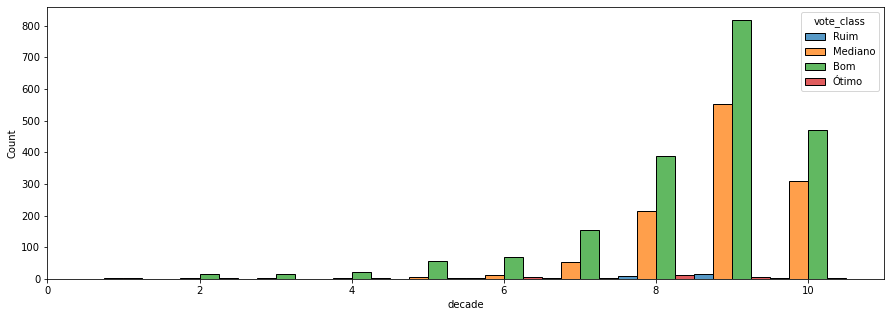

In [40]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
ax = sns.histplot(x = 'decade', hue = "vote_class", multiple = 'dodge', data = df, discrete = True)

<ipython-input-42-f4e8c43ec15a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["","60s","70s", "80s", "90s", "00s", "10s"])
<ipython-input-42-f4e8c43ec15a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["", "","20s", "","30s","", "40s","", "50s"])


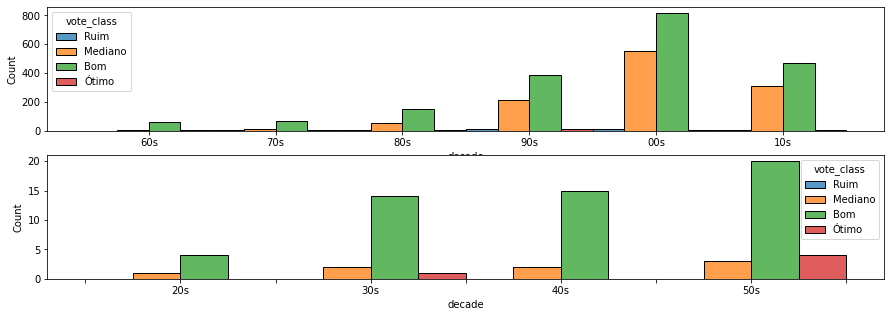

In [42]:
fig, axs = plt.subplots(2,1, figsize = (15,5))
df_newer = df[df['decade'] >=5]
ax = sns.histplot(x = df_newer.decade, hue = "vote_class", multiple = 'dodge', data = df, discrete = True, ax = axs[0])
ax.set_xticklabels(["","60s","70s", "80s", "90s", "00s", "10s"])
df_older = df[df['decade'] < 5]
ax = sns.histplot(x = df_older.decade, hue = "vote_class", multiple = 'dodge', data = df, discrete = True, ax = axs[1])
ax.set_xticklabels(["", "","20s", "","30s","", "40s","", "50s"])
plt.show()

SINCE NUMBER OF MOVIES BY DECADE ARE TOO DIFFERENT, I FIRSTLY SPLIT DATA FOR VISUALIZATION. 

ANOTHER WAY TO OBSERVE THIS DATA AND QUALITY OF MOVIES IS MAKING IT TO PERCENTAGE AS SHOWED BELOW.

In [43]:
for i in range(1,11):
    total = df[df['decade'] == i]['vote_class'].count()
    print(total)

5
17
17
27
65
88
211
623
1390
784


In [46]:
years = ['0','20s','30s','40s','50s','60s','70s','80s','90s','00s','10s']
for i in range(1,11):
    count = df[df['decade'] == i].groupby('vote_class')['vote_class'].count()
    total = df[df['decade'] == i]['vote_class'].count()
    freq = round(count/total, 2)
    print('{} - Decade class: {}'.format(years[i], i))
    print(freq)

20s - Decade class: 1
vote_class
Ruim       0.0
Mediano    0.2
Bom        0.8
Ótimo      0.0
Name: vote_class, dtype: float64
30s - Decade class: 2
vote_class
Ruim       0.00
Mediano    0.12
Bom        0.82
Ótimo      0.06
Name: vote_class, dtype: float64
40s - Decade class: 3
vote_class
Ruim       0.00
Mediano    0.12
Bom        0.88
Ótimo      0.00
Name: vote_class, dtype: float64
50s - Decade class: 4
vote_class
Ruim       0.00
Mediano    0.11
Bom        0.74
Ótimo      0.15
Name: vote_class, dtype: float64
60s - Decade class: 5
vote_class
Ruim       0.00
Mediano    0.09
Bom        0.88
Ótimo      0.03
Name: vote_class, dtype: float64
70s - Decade class: 6
vote_class
Ruim       0.01
Mediano    0.14
Bom        0.78
Ótimo      0.07
Name: vote_class, dtype: float64
80s - Decade class: 7
vote_class
Ruim       0.01
Mediano    0.25
Bom        0.73
Ótimo      0.01
Name: vote_class, dtype: float64
90s - Decade class: 8
vote_class
Ruim       0.01
Mediano    0.34
Bom        0.62
Ótimo      0.

IS THERE ANY RELATIONSHIP BETWEEN BUDGET OR REVENUE WITH QUALITY OF MOVIE?

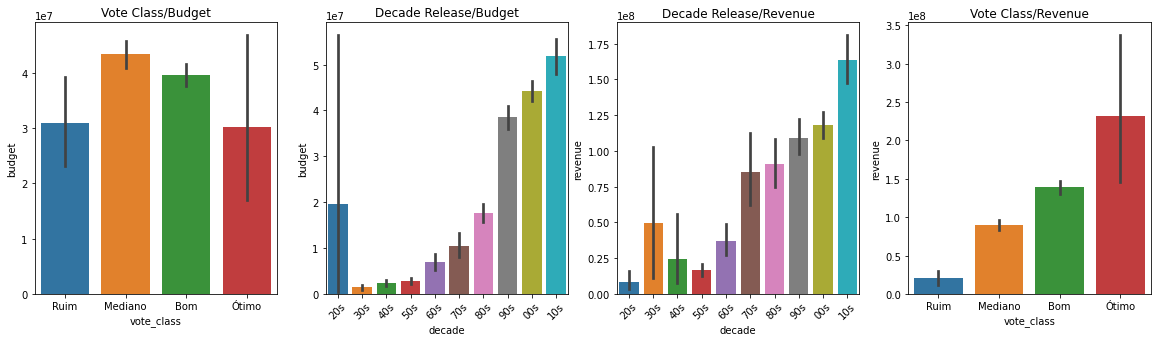

In [47]:
fig, (axes) = plt.subplots(1, 4, figsize = (20, 5))
sns.barplot(ax = axes[0], x = "vote_class", y= "budget", data = df)
axes[0].set_title("Vote Class/Budget")
sns.barplot(ax = axes[1], x = 'decade', y = 'budget', data = df)
axes[1].set_title("Decade Release/Budget")
axes[1].set_xticklabels(['20s','30s','40s','50s','60s','70s','80s','90s','00s','10s'], rotation = 45)
sns.barplot(ax = axes[2], x = 'decade', y = 'revenue', data = df)
axes[2].set_title("Decade Release/Revenue")
axes[2].set_xticklabels(['20s','30s','40s','50s','60s','70s','80s','90s','00s','10s'], rotation = 45)
sns.barplot(ax = axes[3], x = "vote_class", y= "revenue", data = df)
axes[3].set_title("Vote Class/Revenue")
plt.show()

AND ABOUT YEAR?

<AxesSubplot:xlabel='decade', ylabel='vote_average'>

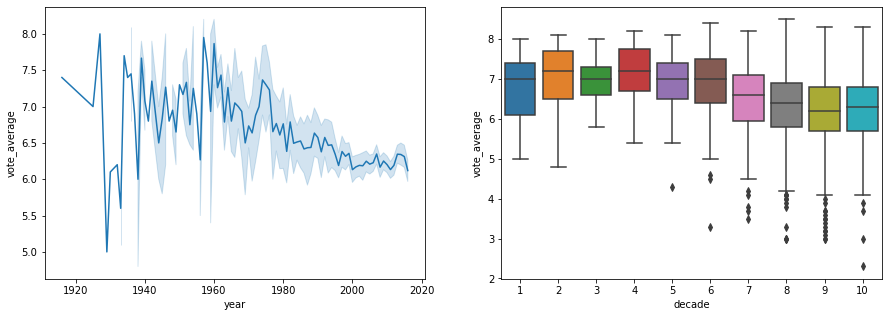

In [49]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
sns.lineplot(x = 'year', y = 'vote_average', data = df, ax = axs[0])
sns.boxplot(x = 'decade', y = 'vote_average', data = df, ax = axs[1])

AS EXPECTED, MOST RECENT MOVIES HAD IN GENERAL HIGHER BUDGET, REVENUE AND VOTE COUNTS. WE COULD EXPECT IT BECAUSE MORE PEOPLE HAVE ACCESS TO THE MOVIES AND CINEMA.

WE ALSO SAW AN HIGHLY INCREASED IN QUANTITIES OF MOVIES PRODUCED IN MOST RECENT YEARS, ESPECIALLY AFTER THE 90s.

IN A OVERALL VIEW, WE OBSERVE A DECREASE IN AVERAGE RATING VALUES. OLDER MOVIES HAD ON AVERAGE HIGHER NOTES. IT COULD BE A CONSEQUENCE OF MUCH HIGHER NUMBER OF MOVIES PRODUCED RECENTLY AND WITH IT SOME BAD MOVIES APPEAR MORE FREQUENTLY.

WHEN WE ANALYSED THE BUDGET OF A MOVIE WITH THE CLASS OF RATING WE CAN SEE THAT THE BEST RANKING MOVIES DID NOT DISPEND HIGHEST BUDGETS. IN FACT, MEDIAN MOVIES ARE THE MOST COSTLY.

WE ALSO SAW THAT BEST RANKED LATEST MOVIES HAVE GREAT REVENUE. 

ON THE '30s', THERE IS A PEAK OF REVENUE. WE CAN ALSO SEE THAT THIS PERIODS REPRESENTS THE MOVIES WITH HIGHER AVERAGE RATINGS.